In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [ ]:
df = pd.read_csv("final_economic_data.csv")

df_total = df[df["Municipality"] == "TOTAL"]

df_total = df_total[(df_total["Year"] >= 2010) & (df_total["Year"] <= 2022)]

In [ ]:
#Predicting Disposable Income

#region specific feature sets

region_features = {
    1: [
        "Gross value added (millions of euro), F Construction (41-43)",
        "Gross value added (millions of euro), K Financial and insurance activities (64-66)",
        "Exports (euro)",
        "Inhabitants, total (PT)",
        "Pensioners (PT)",
        "Wages and salaries received, income",
        "Property income, (incl. holding gains and losses), income",
    ],
    2: [
        "Gross value added (millions of euro), H Transportation and storage (49-53)",
        "Employed (PT)",
        "Unemployed (PT)",
        "Wages and salaries received, income",
        "Property income, (incl. holding gains and losses), income",
    ],
    4: [
        "Gross value added (millions of euro), F Construction (41-43)",
        "Inhabitants, total (PT)",
        "Hours worked, domestic (1 000 000 h)",
        "Unemployed (PT)",
        "Wages and salaries received, income",
        "Property income, (incl. holding gains and losses), income",
    ],
    5: [
        "Gross value added (millions of euro), F Construction (41-43)",
        "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
        "Gross value added (millions of euro), H Transportation and storage (49-53)",
        "Gross value added (millions of euro), K Financial and insurance activities (64-66)",
        "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
        "Inhabitants, total (PT)",
        "Employer's social security contributions, income",
    ],
    6: [
        "Gross value added (millions of euro), H Transportation and storage (49-53)",
        "Employed (PT)",
        "Hours worked, domestic (1 000 000 h)",
        "Unemployed (PT)",
        "Wages and salaries received, income",
        "Property income, (incl. holding gains and losses), income",
    ],
    7: [
        "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
        "Gross value added (millions of euro), H Transportation and storage (49-53)",
        "Gross value added (millions of euro), K Financial and insurance activities (64-66)",
        "Hours worked, domestic (1 000 000 h)",
        "Unemployed (PT)",
        "Wages and salaries received, income",
        "Property income, (incl. holding gains and losses), income",
    ],
    8: [
        "Gross value added (millions of euro), F Construction (41-43)",
        "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
        "Gross value added (millions of euro), H Transportation and storage (49-53)",
        "Inhabitants, total (PT)",
        "Unemployed (PT)",
        "Property income, (incl. holding gains and losses), income",
    ],
    9: [
        "Gross value added (millions of euro), F Construction (41-43)",
        "Gross value added (millions of euro), K Financial and insurance activities (64-66)",
        "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
        "Imports (euro)",
        "Employed (PT)",
        "Inhabitants, total (PT)",
        "Employer's social security contributions, income",
        "Property income, (incl. holding gains and losses), income",
    ],
    10: [
        "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
        "Gross value added (millions of euro), H Transportation and storage (49-53)",
        "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
        "Inhabitants, total (PT)",
        "Unemployed (PT)",
        "Pensioners (PT)",
        "Employer's social security contributions, income",
        "Property income, (incl. holding gains and losses), income",
    ],
    11: [
        "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
        "Gross value added (millions of euro), H Transportation and storage (49-53)",
        "Imports (euro)",
        "Inhabitants, total (PT)",
        "Pensioners (PT)",
        "Wages and salaries received, income",
        "Employer's social security contributions, income",
        "Property income, (incl. holding gains and losses), income",
    ],
    12: [
        "Gross value added (millions of euro), F Construction (41-43)",
        "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
        "Gross value added (millions of euro), H Transportation and storage (49-53)",
        "Gross value added (millions of euro), K Financial and insurance activities (64-66)",
        "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
        "Employed (PT)",
        "Inhabitants, total (PT)",
        "Property income, (incl. holding gains and losses), income",
    ],
    13: [
        "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
        "Employed (PT)",
        "Inhabitants, total (PT)",
        "Hours worked, domestic (1 000 000 h)",
        "Unemployed (PT)",
        "Property income, (incl. holding gains and losses), income",
    ],
    14: [
        "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
        "Imports (euro)",
        "Employed (PT)",
        "Unemployed (PT)",
        "Pensioners (PT)",
        "Wages and salaries received, income",
        "Property income, (incl. holding gains and losses), income",
    ],
    15: [
        "Gross value added (millions of euro), F Construction (41-43)",
        "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
        "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
        "Hours worked, domestic (1 000 000 h)",
        "Unemployed (PT)",
        "Wages and salaries received, income",
        "Property income, (incl. holding gains and losses), income",
    ],
    16: [
        "Gross value added (millions of euro), H Transportation and storage (49-53)",
        "Gross value added (millions of euro), K Financial and insurance activities (64-66)",
        "Employed (PT)",
        "Hours worked, domestic (1 000 000 h)",
        "Unemployed (PT)",
        "Wages and salaries received, income",
        "Property income, (incl. holding gains and losses), income",
    ],
    17: [
        "Gross value added (millions of euro), F Construction (41-43)",
        "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
        "Exports (euro)",
        "Employed (PT)",
        "Inhabitants, total (PT)",
        "Hours worked, domestic (1 000 000 h)",
        "Employer's social security contributions, income",
    ],
    18: [
        "Gross value added (millions of euro), F Construction (41-43)",
        "Gross value added (millions of euro), K Financial and insurance activities (64-66)",
        "Exports (euro)",
        "Employed (PT)",
        "Inhabitants, total (PT)",
        "Hours worked, domestic (1 000 000 h)",
        "Employer's social security contributions, income",
        "Property income, (incl. holding gains and losses), income",
    ],
    19: [
        "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
        "Imports (euro)",
        "Exports (euro)",
        "Hours worked, domestic (1 000 000 h)",
        "Pensioners (PT)",
        "Wages and salaries received, income",
        "Employer's social security contributions, income",
        "Property income, (incl. holding gains and losses), income",
    ],
    21: [
        "Gross value added (millions of euro), F Construction (41-43)",
        "Gross value added (millions of euro), H Transportation and storage (49-53)",
        "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
        "Imports (euro)",
        "Wages and salaries received, income",
        "Property income, (incl. holding gains and losses), income",
    ],
}

target_col = "Disposable income, net"

regions = df_total["Region"].unique()


Region 1
cols_features = [
    "Gross value added (millions of euro), F Construction (41-43)",
    "Gross value added (millions of euro), K Financial and insurance activities (64-66)",
    "Exports (euro)",
    "Inhabitants, total (PT)",
    "Pensioners (PT)",
    "Wages and salaries received, income",
    "Property income, (incl. holding gains and losses), income",
]
Region 1 - Train R²: 0.988839500052791
Region 1 - Test  R²: 0.9994804809631952


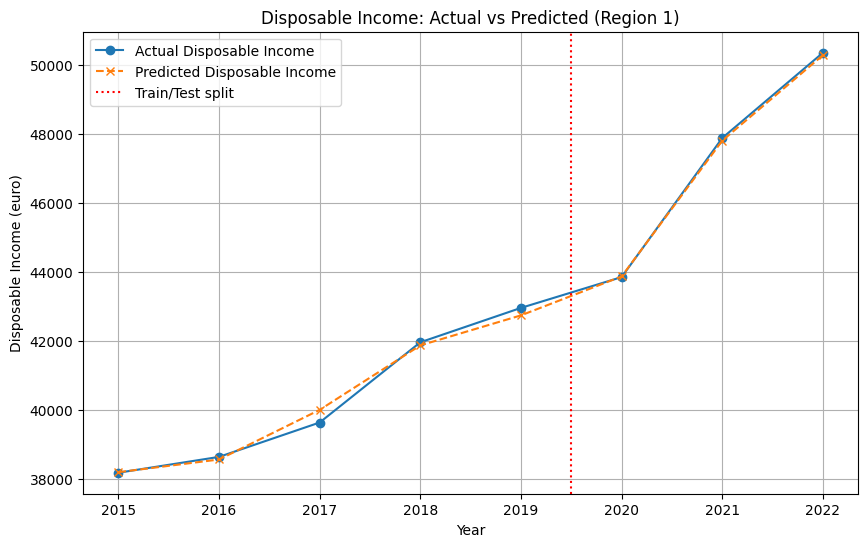


Region 2
cols_features = [
    "Gross value added (millions of euro), H Transportation and storage (49-53)",
    "Employed (PT)",
    "Unemployed (PT)",
    "Wages and salaries received, income",
    "Property income, (incl. holding gains and losses), income",
]
Region 2 - Train R²: 0.9959535921263283
Region 2 - Test  R²: 0.9819298616123169


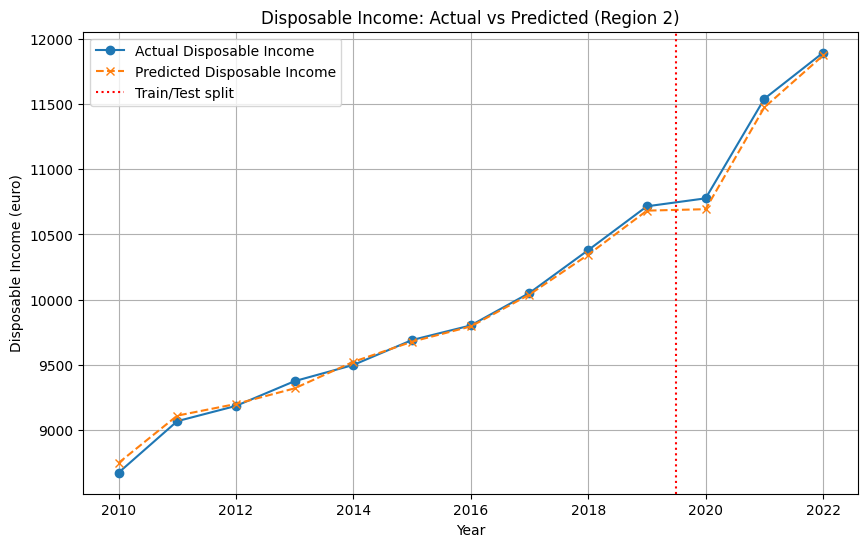


Region 4
cols_features = [
    "Gross value added (millions of euro), F Construction (41-43)",
    "Inhabitants, total (PT)",
    "Hours worked, domestic (1 000 000 h)",
    "Unemployed (PT)",
    "Wages and salaries received, income",
    "Property income, (incl. holding gains and losses), income",
]
Region 4 - Train R²: 0.9619893616080362
Region 4 - Test  R²: 0.9989450195441681


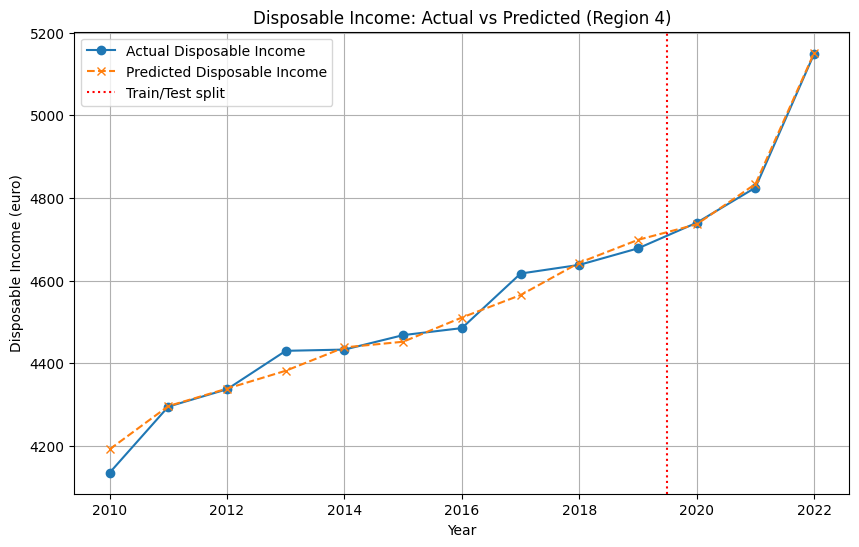


Region 5
cols_features = [
    "Gross value added (millions of euro), F Construction (41-43)",
    "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
    "Gross value added (millions of euro), H Transportation and storage (49-53)",
    "Gross value added (millions of euro), K Financial and insurance activities (64-66)",
    "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
    "Inhabitants, total (PT)",
    "Employer's social security contributions, income",
]
Region 5 - Train R²: 0.9835992987072314
Region 5 - Test  R²: 0.9992454184843338


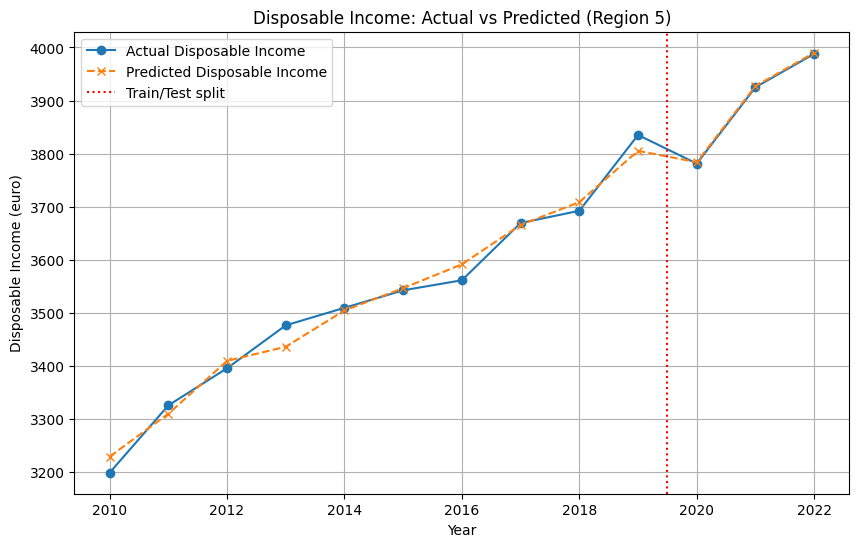


Region 6
cols_features = [
    "Gross value added (millions of euro), H Transportation and storage (49-53)",
    "Employed (PT)",
    "Hours worked, domestic (1 000 000 h)",
    "Unemployed (PT)",
    "Wages and salaries received, income",
    "Property income, (incl. holding gains and losses), income",
]
Region 6 - Train R²: 0.9961970188164455
Region 6 - Test  R²: 0.9996957420596149


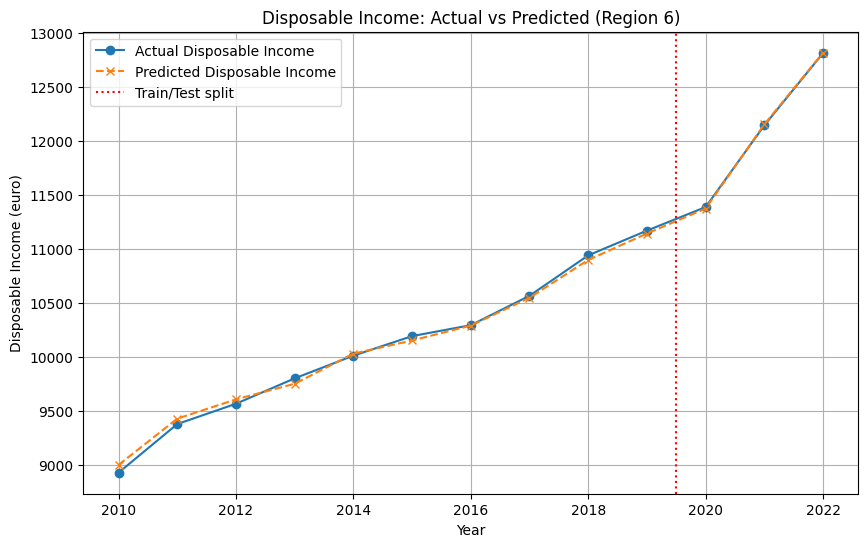


Region 7
cols_features = [
    "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
    "Gross value added (millions of euro), H Transportation and storage (49-53)",
    "Gross value added (millions of euro), K Financial and insurance activities (64-66)",
    "Hours worked, domestic (1 000 000 h)",
    "Unemployed (PT)",
    "Wages and salaries received, income",
    "Property income, (incl. holding gains and losses), income",
]
Region 7 - Train R²: 0.9955447560863858
Region 7 - Test  R²: 0.9999546197714846


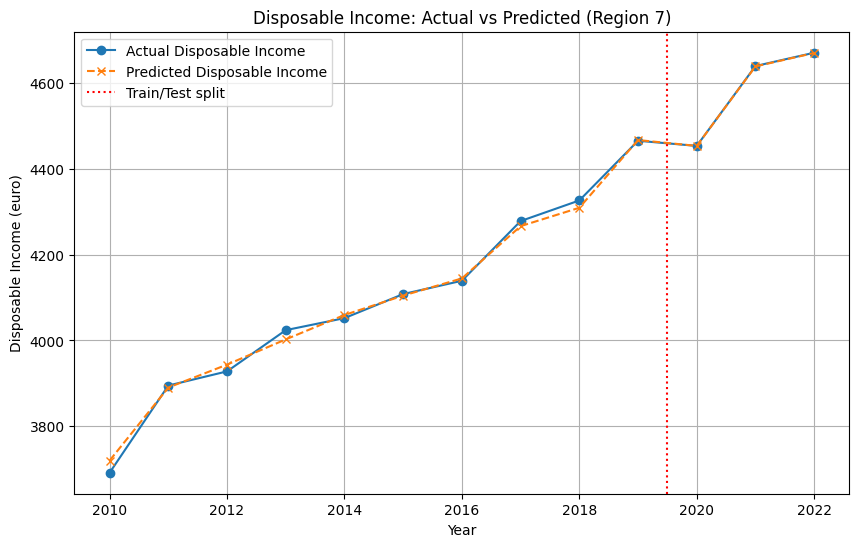


Region 8
cols_features = [
    "Gross value added (millions of euro), F Construction (41-43)",
    "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
    "Gross value added (millions of euro), H Transportation and storage (49-53)",
    "Inhabitants, total (PT)",
    "Unemployed (PT)",
    "Property income, (incl. holding gains and losses), income",
]
Region 8 - Train R²: 0.991700226627813
Region 8 - Test  R²: 0.9986632197377506


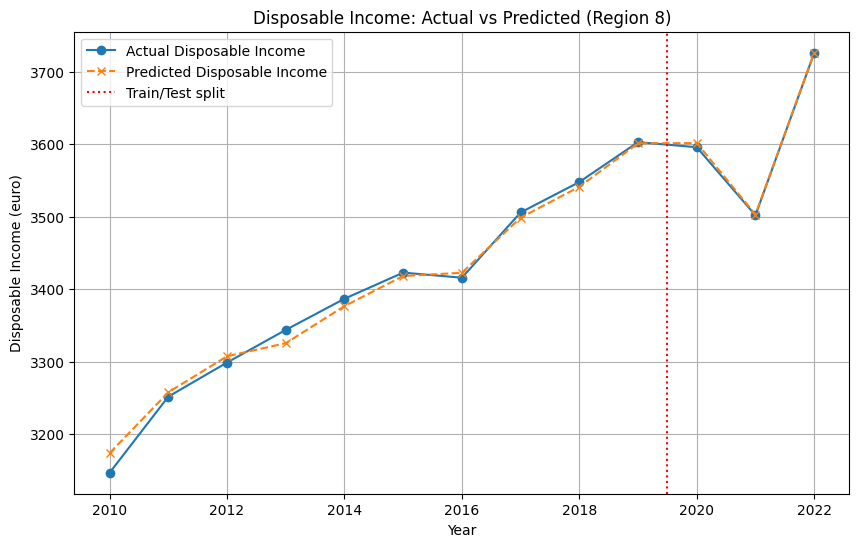


Region 9
cols_features = [
    "Gross value added (millions of euro), F Construction (41-43)",
    "Gross value added (millions of euro), K Financial and insurance activities (64-66)",
    "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
    "Imports (euro)",
    "Employed (PT)",
    "Inhabitants, total (PT)",
    "Employer's social security contributions, income",
    "Property income, (incl. holding gains and losses), income",
]
Region 9 - Train R²: 0.9886498272334463
Region 9 - Test  R²: 0.9961192475169589


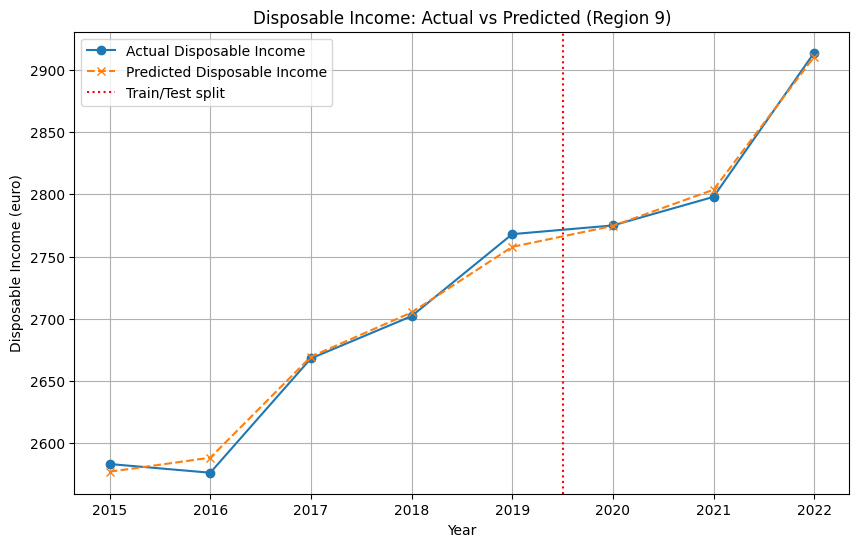


Region 10
cols_features = [
    "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
    "Gross value added (millions of euro), H Transportation and storage (49-53)",
    "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
    "Inhabitants, total (PT)",
    "Unemployed (PT)",
    "Pensioners (PT)",
    "Employer's social security contributions, income",
    "Property income, (incl. holding gains and losses), income",
]
Region 10 - Train R²: 0.979310016768754
Region 10 - Test  R²: 0.9998838819298864


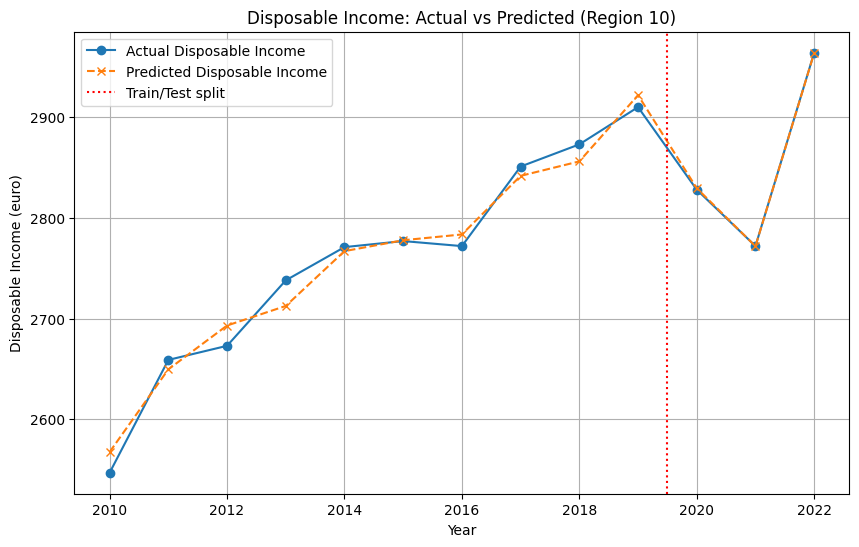


Region 11
cols_features = [
    "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
    "Gross value added (millions of euro), H Transportation and storage (49-53)",
    "Imports (euro)",
    "Inhabitants, total (PT)",
    "Pensioners (PT)",
    "Wages and salaries received, income",
    "Employer's social security contributions, income",
    "Property income, (incl. holding gains and losses), income",
]
Region 11 - Train R²: 0.9953958365449194
Region 11 - Test  R²: 0.9975442805565646


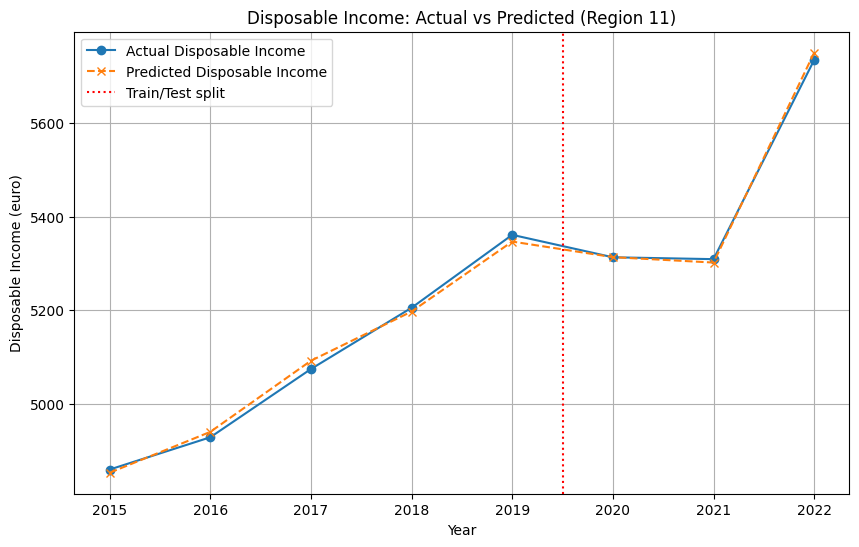


Region 12
cols_features = [
    "Gross value added (millions of euro), F Construction (41-43)",
    "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
    "Gross value added (millions of euro), H Transportation and storage (49-53)",
    "Gross value added (millions of euro), K Financial and insurance activities (64-66)",
    "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
    "Employed (PT)",
    "Inhabitants, total (PT)",
    "Property income, (incl. holding gains and losses), income",
]
Region 12 - Train R²: 0.9699297769100103
Region 12 - Test  R²: 0.9999770482731829


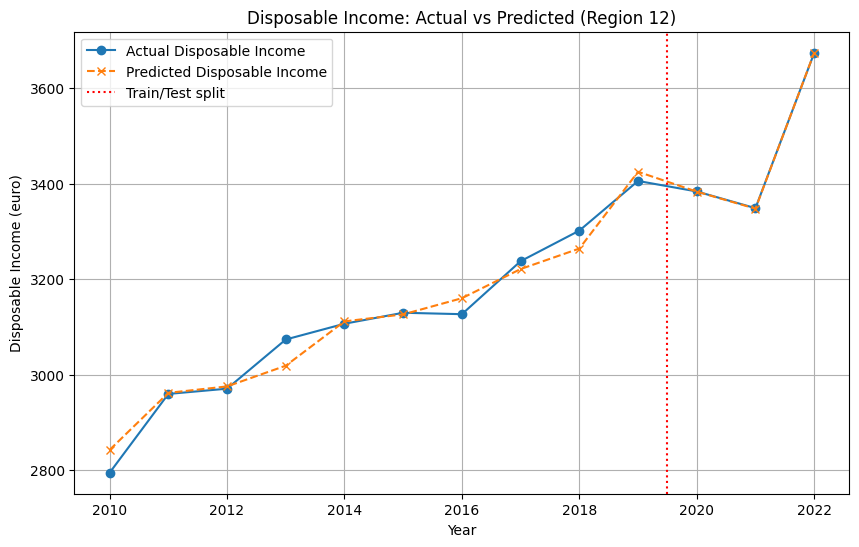


Region 13
cols_features = [
    "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
    "Employed (PT)",
    "Inhabitants, total (PT)",
    "Hours worked, domestic (1 000 000 h)",
    "Unemployed (PT)",
    "Property income, (incl. holding gains and losses), income",
]
Region 13 - Train R²: 0.9894344008491851
Region 13 - Test  R²: 0.9999344254410658


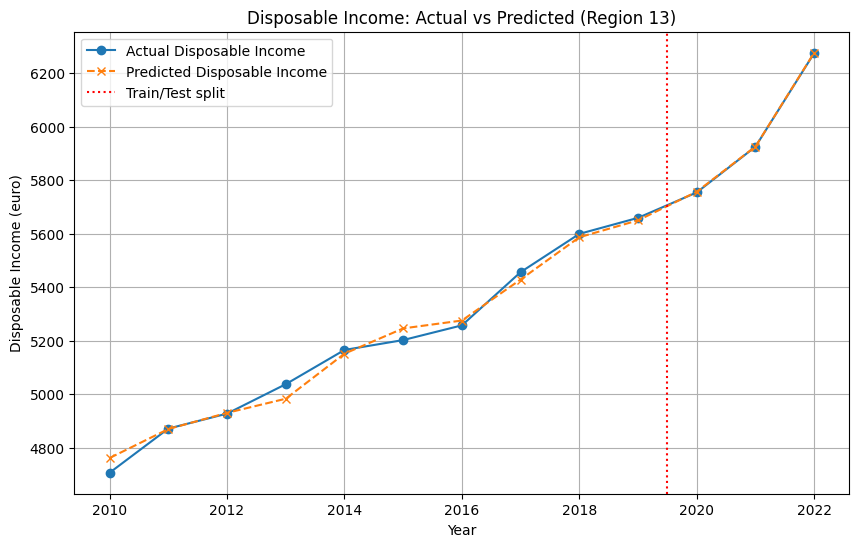


Region 14
cols_features = [
    "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
    "Imports (euro)",
    "Employed (PT)",
    "Unemployed (PT)",
    "Pensioners (PT)",
    "Wages and salaries received, income",
    "Property income, (incl. holding gains and losses), income",
]
Region 14 - Train R²: 0.9815778357184636
Region 14 - Test  R²: 0.9898705911805534


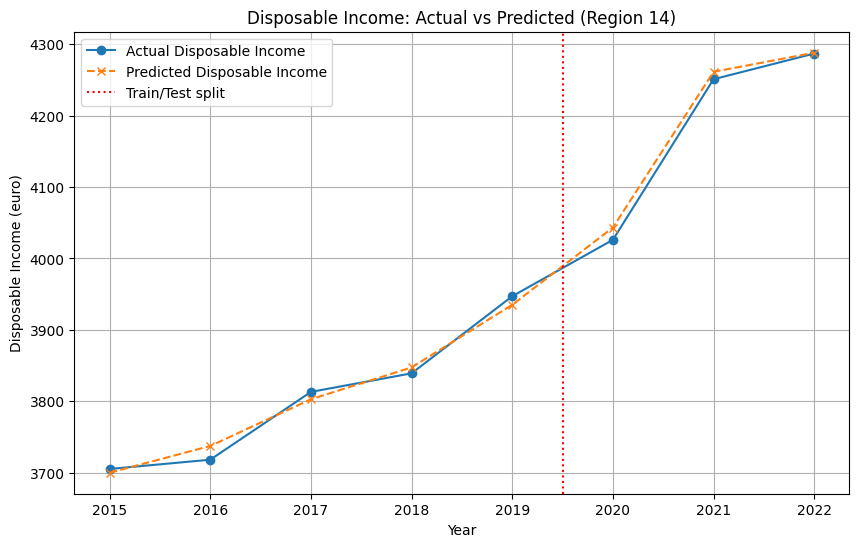


Region 15
cols_features = [
    "Gross value added (millions of euro), F Construction (41-43)",
    "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
    "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
    "Hours worked, domestic (1 000 000 h)",
    "Unemployed (PT)",
    "Wages and salaries received, income",
    "Property income, (incl. holding gains and losses), income",
]
Region 15 - Train R²: 0.9943030391412291
Region 15 - Test  R²: 0.9966634928558971


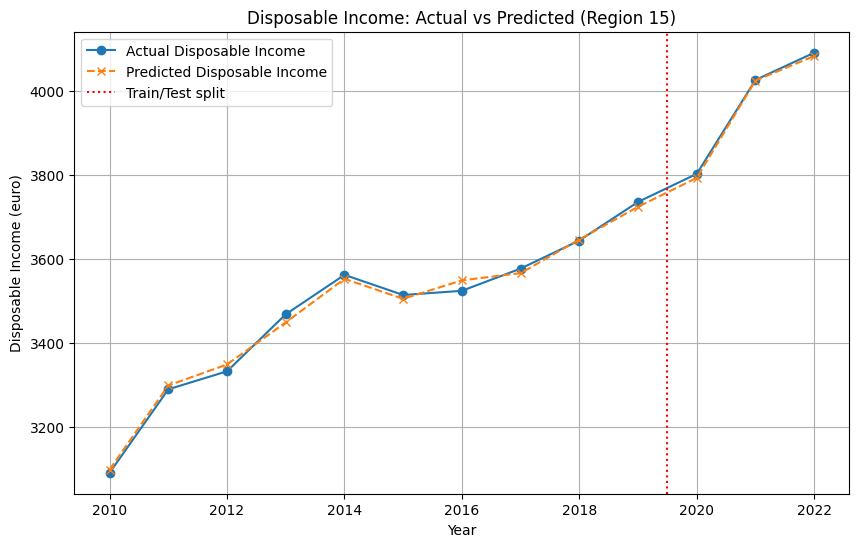


Region 16
cols_features = [
    "Gross value added (millions of euro), H Transportation and storage (49-53)",
    "Gross value added (millions of euro), K Financial and insurance activities (64-66)",
    "Employed (PT)",
    "Hours worked, domestic (1 000 000 h)",
    "Unemployed (PT)",
    "Wages and salaries received, income",
    "Property income, (incl. holding gains and losses), income",
]
Region 16 - Train R²: 0.9917250149571201
Region 16 - Test  R²: 0.994186090755534


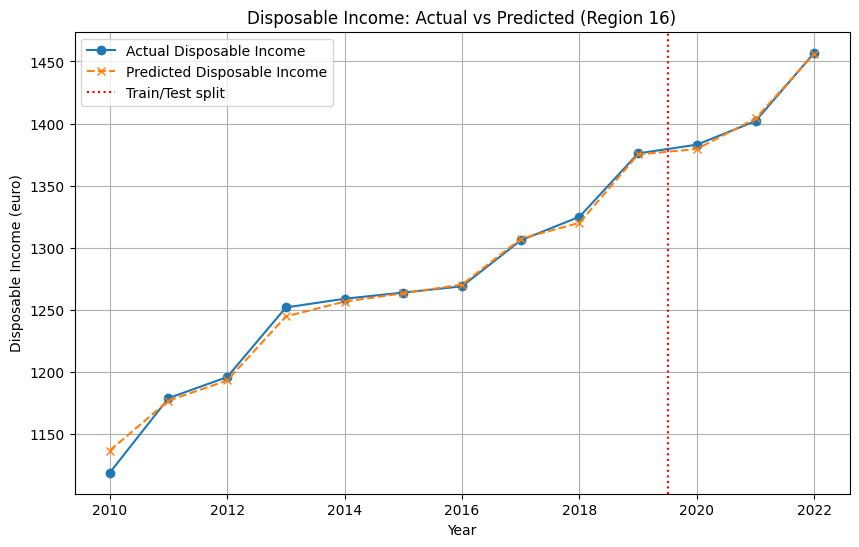


Region 17
cols_features = [
    "Gross value added (millions of euro), F Construction (41-43)",
    "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
    "Exports (euro)",
    "Employed (PT)",
    "Inhabitants, total (PT)",
    "Hours worked, domestic (1 000 000 h)",
    "Employer's social security contributions, income",
]
Region 17 - Train R²: 0.9752782919881314
Region 17 - Test  R²: 0.9996680388433101


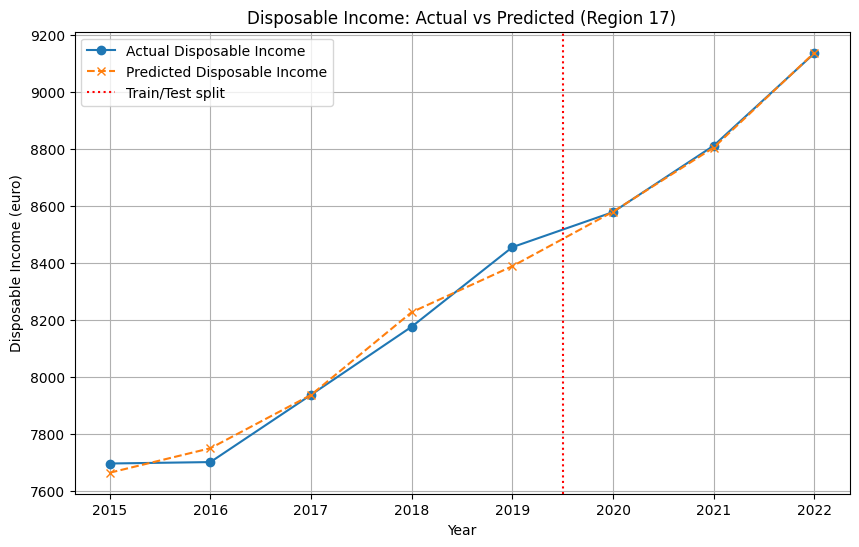


Region 18
cols_features = [
    "Gross value added (millions of euro), F Construction (41-43)",
    "Gross value added (millions of euro), K Financial and insurance activities (64-66)",
    "Exports (euro)",
    "Employed (PT)",
    "Inhabitants, total (PT)",
    "Hours worked, domestic (1 000 000 h)",
    "Employer's social security contributions, income",
    "Property income, (incl. holding gains and losses), income",
]
Region 18 - Train R²: 0.997365688206126
Region 18 - Test  R²: 0.9996545210136162


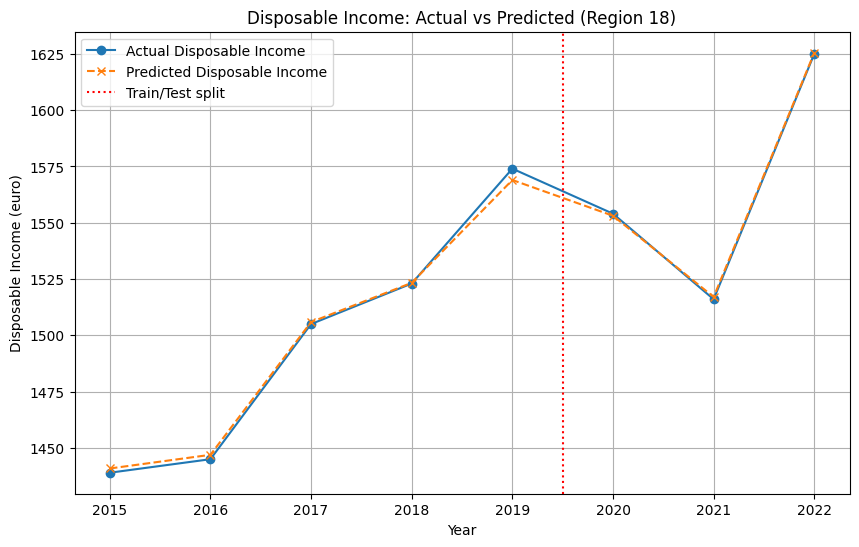


Region 19
cols_features = [
    "Gross value added (millions of euro), G Wholesale and retail trade; repair of motor vehicles and motorcycles (45-47)",
    "Imports (euro)",
    "Exports (euro)",
    "Hours worked, domestic (1 000 000 h)",
    "Pensioners (PT)",
    "Wages and salaries received, income",
    "Employer's social security contributions, income",
    "Property income, (incl. holding gains and losses), income",
]
Region 19 - Train R²: 0.9952238151889409
Region 19 - Test  R²: 0.9932611741319161


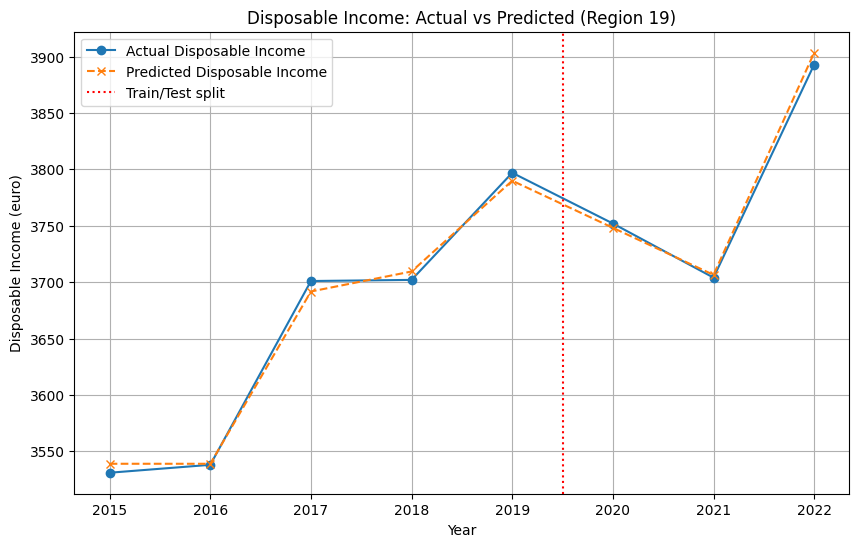


Region 21
cols_features = [
    "Gross value added (millions of euro), F Construction (41-43)",
    "Gross value added (millions of euro), H Transportation and storage (49-53)",
    "Gross value added (millions of euro), Q Human health and social work activities (86-88)",
    "Imports (euro)",
    "Wages and salaries received, income",
    "Property income, (incl. holding gains and losses), income",
]
Region 21 - Train R²: 0.9492908892110712
Region 21 - Test  R²: 0.9938961529030622


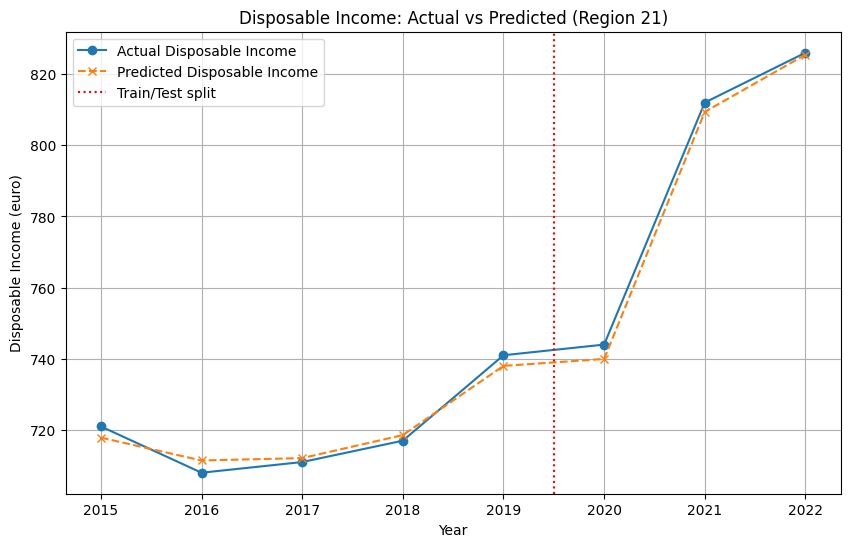

In [ ]:
for region in sorted(region_features.keys()):
    cols_features = region_features[region]

    print(f"\nRegion {region}")
    print("cols_features = [")
    for f in cols_features:
        print(f'    "{f}",')
    print("]")

    df_region = df_total[df_total["Region"] == region]
    
    #drop missing values
    df_model = df_region[["Year"] + cols_features + [target_col]].dropna()

    #drop empty and with not enough data regions
    if len(df_model) < 4:
        continue

    #features, target, year
    X = df_model[cols_features].copy()
    y = df_model[target_col]
    years = df_model["Year"]

    #adding year as predictor (new column)
    X["Year"] = years

    #train/test split by year
    X_train = X.loc[years <= 2019]
    y_train = y.loc[years <= 2019]
    X_test  = X.loc[years >= 2020]
    y_test  = y.loc[years >= 2020]
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #Ridge Regression (regularized LR)
    model = Ridge(alpha=1.0)
    model.fit(X_train_scaled, y_train)

    #predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test  = model.predict(X_test_scaled)

    #predict on all data for plotting
    X_scaled_all = scaler.transform(X)
    y_pred_all = model.predict(X_scaled_all)
    
    results = pd.DataFrame({
        "Year": years,
        "Actual Disposable Income": y,
        "Predicted Disposable Income": y_pred_all
    }).sort_values("Year")
    
    print(f"Region {region} - Train R²:", model.score(X_train_scaled, y_train))
    print(f"Region {region} - Test  R²:", model.score(X_test_scaled, y_test))
    
    plt.figure(figsize=(10,6))
    plt.plot(results["Year"], results["Actual Disposable Income"], label="Actual Disposable Income", marker="o")
    plt.plot(results["Year"], results["Predicted Disposable Income"], label="Predicted Disposable Income", marker="x", linestyle="--")
    plt.axvline(2019.5, color="red", linestyle=":", label="Train/Test split")
    plt.xlabel("Year")
    plt.ylabel("Disposable Income (euro)")
    plt.title(f"Disposable Income: Actual vs Predicted (Region {region})")
    plt.legend()
    plt.grid(True)
    plt.show()